# Best Streaming Service Analysis


<img src="images/tv.jpg">

There is a lot of competition between all the major streaming services like Netflix, Prime Video, Hulu, and Disney+. As a Data Scientist, it could be a very amazing task for you to find which is the best streaming service among them. In this project, I’m going to introduce you to a data science project on the best streaming service analysis with Python.

In [97]:
import numpy as np # linear algebra
import pandas as pd # data processing

import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt


In [98]:
df = pd.read_csv('data/tv_shows.csv', index_col=0)

In [99]:
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [100]:
df.drop_duplicates(subset='Title',
                         keep='first',inplace=True)

In [101]:
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].apply(lambda x: x.split('/')[0])
df['IMDb'] = df['IMDb'].fillna('0/10')
df['IMDb'] = df['IMDb'].apply(lambda x: str(x).split('/')[0] if pd.notnull(x) else x)

df['IMDb'] = df['IMDb'].astype('float')
df['Rotten Tomatoes'] = pd.to_numeric(df['Rotten Tomatoes'])


In [102]:
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,18+,9.4,100,1,0,0,0,1
1,2,Stranger Things,2016,16+,8.7,96,1,0,0,0,1
2,3,Attack on Titan,2013,18+,9.0,95,1,1,0,0,1
3,4,Better Call Saul,2015,18+,8.8,94,1,0,0,0,1
4,5,Dark,2017,16+,8.8,93,1,0,0,0,1


In [103]:
df_long=pd.melt(df[['Title','Netflix','Hulu','Disney+',
                                'Prime Video']],id_vars=['Title'],
                      var_name='StreamingOn', value_name='Present')
df_long = df_long[df_long['Present'] == 1]
df_long.drop(columns=['Present'],inplace=True)

In [104]:
tv_shows_combined = df_long.merge(df, on='Title', how='inner')
tv_shows_combined.drop(columns = ['Netflix',
                                  'Hulu', 'Prime Video', 'Disney+', 'Type'], inplace=True)

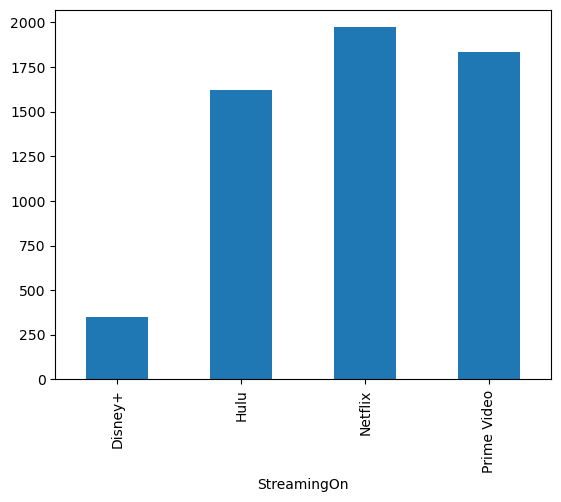

In [108]:
tv_shows_both_ratings = tv_shows_combined[(tv_shows_combined.IMDb > 0) & tv_shows_combined['Rotten Tomatoes'] > 0]
tv_shows_combined.groupby('StreamingOn').Title.count().plot(kind='bar');

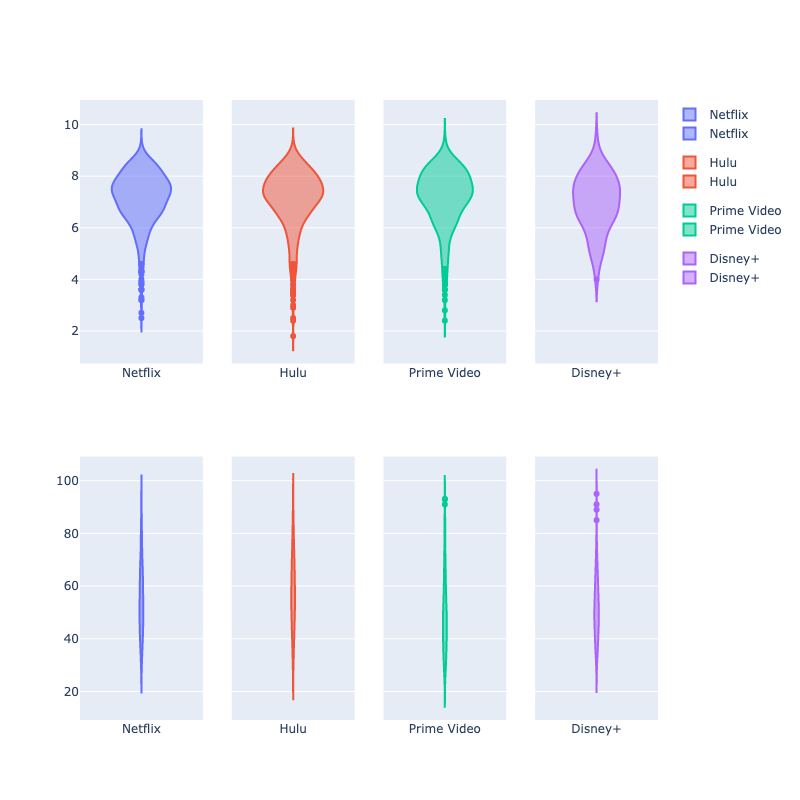

In [107]:
figure = []
figure.append(px.violin(tv_shows_both_ratings, x = 'StreamingOn', y = 'IMDb', color='StreamingOn'))
figure.append(px.violin(tv_shows_both_ratings, x = 'StreamingOn', y = 'Rotten Tomatoes', color='StreamingOn'))
fig = make_subplots(rows=2, cols=4, shared_yaxes=True)

for i in range(2):
    for j in range(4):
        fig.add_trace(figure[i]['data'][j], row=i+1, col=j+1)

fig.update_layout(autosize=False, width=800, height=800)        
fig.show('png')

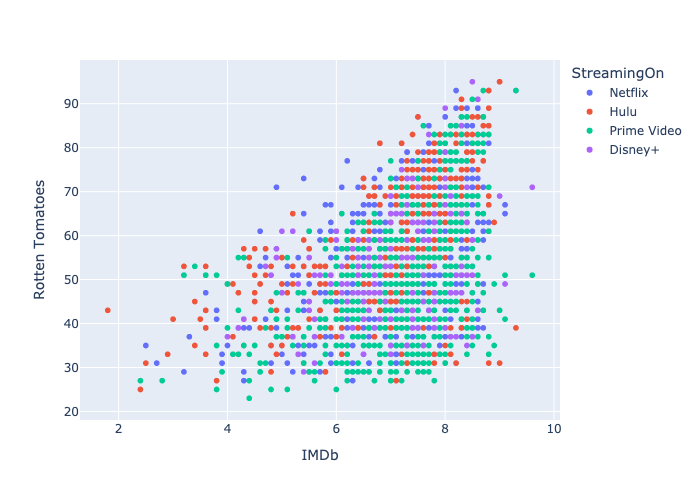

In [111]:
fig = px.scatter(tv_shows_both_ratings, x='IMDb',
           y='Rotten Tomatoes',color='StreamingOn')
fig.show('png')

## Conclusion:

By using the violin chart we can observe that:

1. Hulu, Netflix, and Amazon Videos all have important data. As content increases, quality decreases for all three.
2. Prime Videos has become denser in the top half when looking at IMDB and performs well in cool.
3. Disney+ being new, has also been very successful in this area.

Using the scatter plot we can observe that it is quite obvious that Amazon Prime performs very well in the fourth quadrant. Even by using the bar plot, we can observe that Amazon prime had a great quantity of content. So looking at all the streaming platforms we can conclude that Amazon Prime is better in both quality and quantity.